## Pre-Lec

In [1]:
%matplotlib inline

## 1.

The standard deviation represents how much the data points differ from the mean. It shows how spread apart data points typically are from the mean. The standard error of the mean is dispersion of the calculated means from multiple (lots) of bootstrapped samples. You can get the standard error of the mean by calculating the standard deviation of the histogram which contains all the means.

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## 2.

For normal distribution, about 95% of the data lies within 1.96 standard deviations of the mean. Assuming our bootstrapped samples form a normal distribution histogram, our 95% confidence interval should between 1.96 standard deviations from the left of the mean, and 1.96 standard deviations from the right of the mean. So let the mean be m, the interval would be (m-1.96, m+1.96).

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## 3.

You can collect all the means from the bootstrapped samples and sort them from least to greatest. What we want it the middle 95% so we should get rid of the lower 2.5 percent and the upper 2.5 percent. Then we will have the remaining middle 95% and the range of that will be our 95% bootstrapped confidence interval.

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## 4.

**Sample:**

Mean = 100 \
Standard deviation = 15 \
Sample size = 100

Perform bootstrap for 1000 bootstrapped samples.



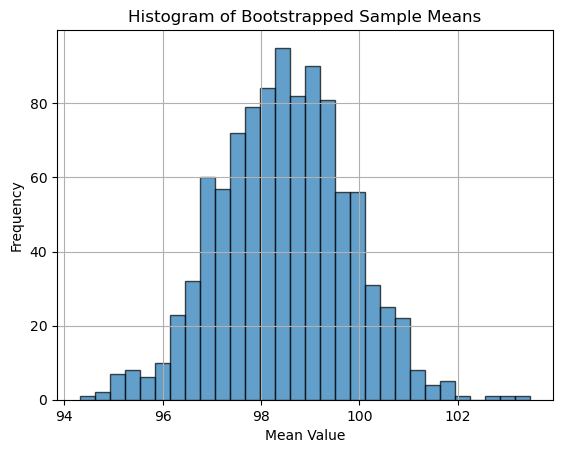

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a random sample to use (if you don't already have one)
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=15, size=100)  # A normal distribution sample (mean=100, std=15, n=100)

# Step 2: Perform bootstrapping to collect 1000 bootstrapped sample means
num_bootstrap_samples = 1000
bootstrap_means = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Step 3: Create a histogram of the bootstrapped sample means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrapped Sample Means')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


We need only to change the parameter np.mean to np.median in order to calculate for the medians instead of means.


In [3]:
#Original:
bootstrap_means.append(np.mean(bootstrap_sample))

#Change:

bootstrap_means.append(np.median(bootstrap_sample))


#And change the variable name to make more sense. This doesn't change how the code works.

#bootstrap_means to bootstrap_medians

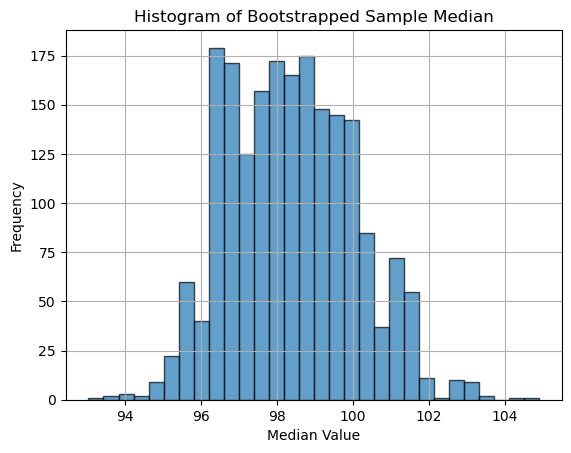

In [4]:
#Here we calculate for the 95% confidence interval of bootstrapped medians

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a random sample to use (if you don't already have one)
np.random.seed(42)  # For reproducibility
sample = np.random.normal(loc=100, scale=15, size=100)  # A normal distribution sample (mean=100, std=15, n=100)

# Step 2: Perform bootstrapping to collect 1000 bootstrapped sample means
num_bootstrap_samples = 1000
bootstrap_medians = []

for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.median(bootstrap_sample))

# Step 3: Create a histogram of the bootstrapped sample means
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrapped Sample Median')
plt.xlabel('Median Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## Post-Lec

## 5.

The population paramater is a fixed value that describes some characteristic of an entire population of data. The sample statistic is the estimate of the population parameter that we calculate through a sample of the entire population. When it comes to confidence intervals, we use the sample statistic (which is a calculation of the estimate of the population parameter) to help us narrow down a range in which the population paramater lies within.

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## 6.

1. So, we start with a sample of data. This sample does not represent the entire population but that is precisely why we perform bootstrapping. So Lets say this sample has 10 values/data points. The first step to bootstrapping is to create a bootstrapped sample. A bootstrapped sample is made up of random selections of data points from the original sample. It is also the same amount of data points as the original. But since it is random, some values may be selected more than once and some not at all. Step 2, we then calculate some paramater of this bootstrap sample (depending on what we want to calculate, let's do the mean). Step 3, we take this calculated paramater, the mean, and we log it down. Then we repeat from step 1 for a large amount of times. We repeat it a lot because we are simulating the original sample to represent the entire population. Let's run 10,000 samples. When we have gathered the means of all 10,000 bootstrapped samples, we can make a histogram out of it and now we have an estimate of the means of the entire population.
<br>

2. The main purpose of bootstrapping is calculating standard errors and confidence intervals from a small sample to represent the larger population. It is also used to test hypotheses.
<br>

3. So you can use the process of bootstrapping to work with the sample of n size. So basically resample it a bunch of times and calculate the average for each of those samples. Then look at the distribution and see if your original guess falls within the 95% confidence interval, your guess might be plausible, but if it falls out of that range, your guess might be off.

ChatGPT was not used for this question.

## 7.

If the confidence interval overlaps zero, it means that zero is within the range of possibilities. So, we cannot reject the null hypothesis and confidently say that the drug does anything because it is possible that it does nothing. On the opposite hand, if the interval does not include zero, it means the null hypothesis is not within the range of possibilities so we can reject it.

https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797

## 8.

## Problem Introduction:

Objective: We have been provided a data set of patients who have taken the vaccine designed by AliTech which is supposed to improve one's health. We are given data such as Patient ID, age, gender, initial health score and final health score. Our job is to determine whether or not the vaccine designed by AliTech is effective in imporving health.

Null Hypothesis: The null hypothesis of "no effect" in this context means that the vaccine has no significant improvment on the patients' health. If the null hypothesis is true, it means the changes in health scores are due to other factor unrelated to the vaccine.



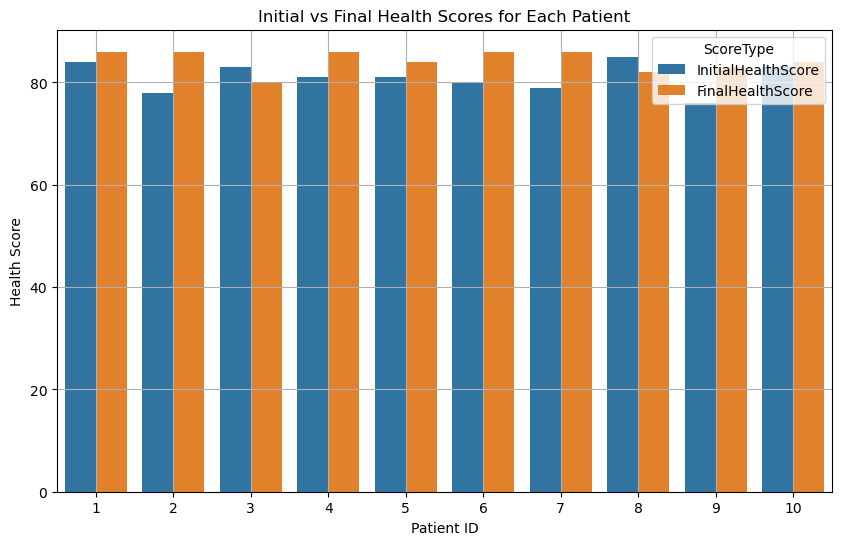

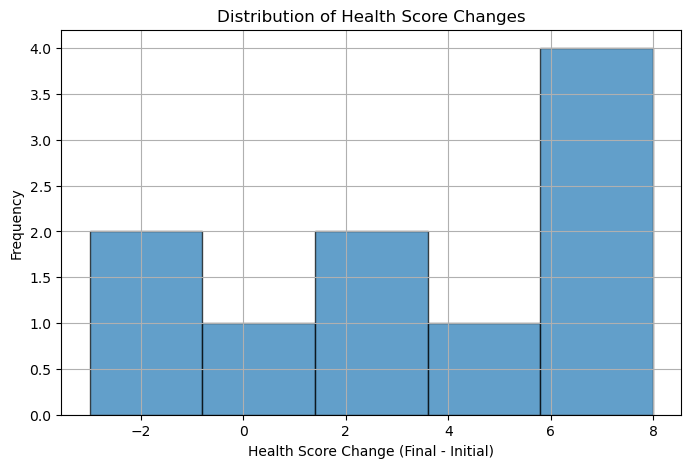

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Plot InitialHealthScore and FinalHealthScore side by side for each patient
df_long = df.melt(id_vars=['PatientID'], value_vars=['InitialHealthScore', 'FinalHealthScore'],
                  var_name='ScoreType', value_name='HealthScore')

plt.figure(figsize=(10, 6))
sns.barplot(x='PatientID', y='HealthScore', hue='ScoreType', data=df_long)
plt.title('Initial vs Final Health Scores for Each Patient')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.grid(True)
plt.show()

# Step 2: Plot the distribution of health score changes (FinalHealthScore - InitialHealthScore)
plt.figure(figsize=(8, 5))
plt.hist(df['HealthScoreChange'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of Health Score Changes')
plt.xlabel('Health Score Change (Final - Initial)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Quantitative Analysis:

We take the provided sample of 10 patients and we perform bootstrapping to generate a 95% confidence interval for the mean health score changes. We will take a bootstrapped sample by choosing 10 patients at random (patients can be chosen more than once) and calculating the mean of this new sample. We will do this for 1000 bootstrapped samples. Then we will take this collection of 1000 bootstrapped samples' means and distribute it along a histogram.

The purpose of this method is that we don't need to test this for 1000 patients as that would be very expensive and time consuming to do. Instead, we can simulate 1000 patients using the 10 patients we have. By running this simulation a large number of times, we can make an estimate of the population parameter by calculating the sample statistic.

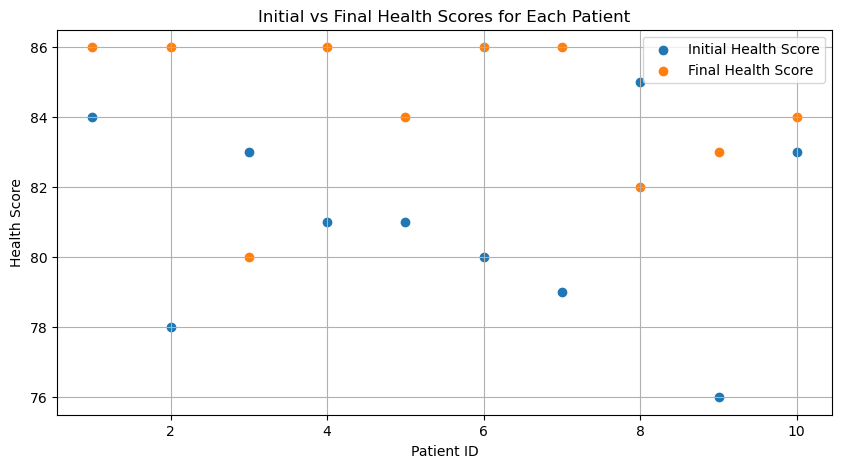

95% Confidence Interval for Health Score Change: [0.70, 5.50]


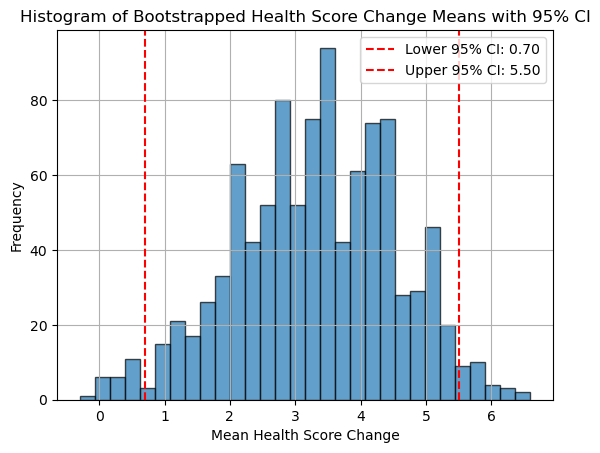

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Data setup
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Step 2: Calculate the difference between final and initial health scores
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Step 3: Scatter plot for Initial and Final Health Scores (without connecting lines)
plt.figure(figsize=(10, 5))

# Plot initial health scores
plt.scatter(df['PatientID'], df['InitialHealthScore'], label='Initial Health Score', marker='o')

# Plot final health scores
plt.scatter(df['PatientID'], df['FinalHealthScore'], label='Final Health Score', marker='o')

plt.title('Initial vs Final Health Scores for Each Patient')
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Bootstrapping to generate a 95% confidence interval for the mean health score change
np.random.seed(42)
bootstrapped_means = []
num_bootstrap_samples = 1000
for _ in range(num_bootstrap_samples):
    bootstrap_sample = np.random.choice(df['HealthScoreChange'], size=len(df), replace=True)
    bootstrapped_means.append(np.mean(bootstrap_sample))

# Step 5: Create a 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

print(f"95% Confidence Interval for Health Score Change: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Step 6: Visualize the bootstrapped means distribution with confidence interval lines
plt.hist(bootstrapped_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Bootstrapped Health Score Change Means with 95% CI')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.grid(True)

# Add vertical lines for the 95% confidence interval
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower 95% CI: {lower_bound:.2f}')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper 95% CI: {upper_bound:.2f}')
plt.legend()

# Show plot
plt.show()


**Conclusion regarding the null hypothesis. We have calculated the 95% confidence interval to be [0.70, 5.50] so we can confidently reject the null hypothesis of zero effect. This means that 0 is not within our 95% confidence interval and is indicates that the vaccine likely has a significant improvement on the patients health. We also derive from the histogram that the mean health change is positive.**


**Below are some extra visualizations for the purpose of seeing if any other correlations exist**

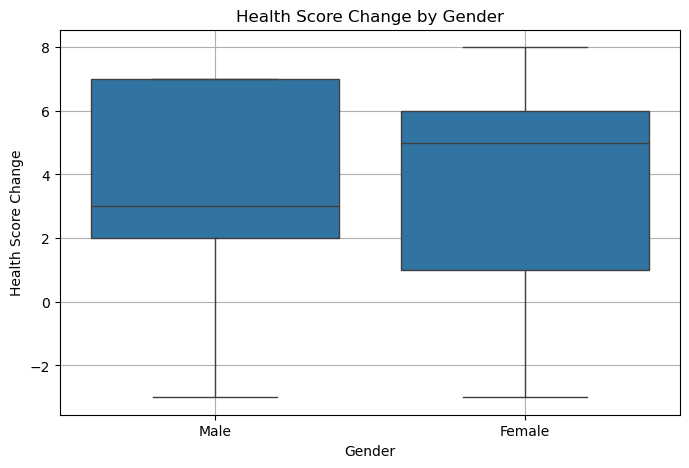

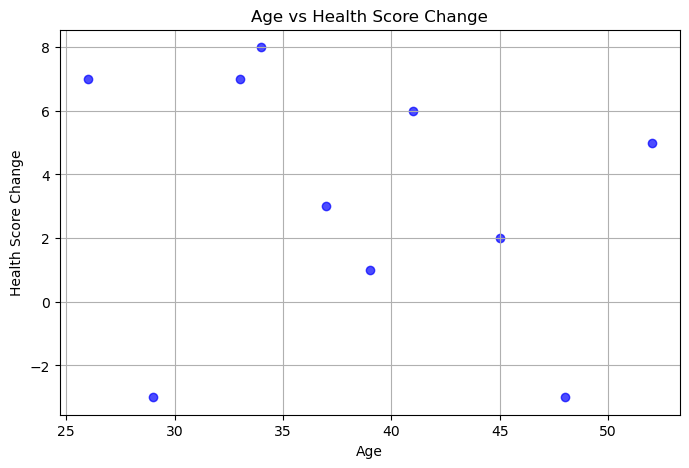

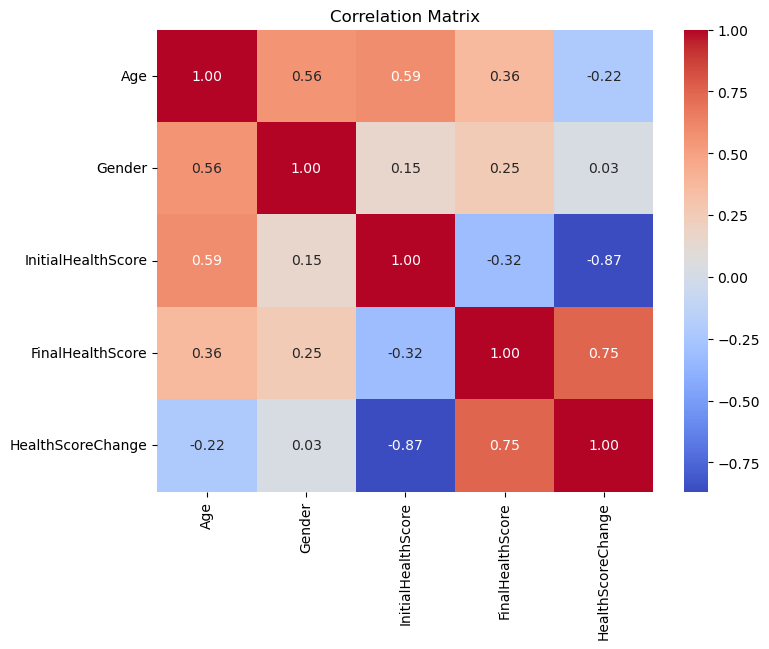

In [14]:
# Map 'M' to 0 and 'F' to 1 for the Gender column
df['Gender'] = df['Gender'].map({'M': 0, 'F': 1})

# Additional Plots for Further Visualization

# Boxplot of Health Score Change by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='HealthScoreChange', data=df)
plt.title('Health Score Change by Gender')
plt.xlabel('Gender')
plt.ylabel('Health Score Change')
plt.xticks([0, 1], ['Male', 'Female'])
plt.grid(True)
plt.show()

# Scatter Plot of Age vs Health Score Change
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['HealthScoreChange'], color='blue', alpha=0.7)
plt.title('Age vs Health Score Change')
plt.xlabel('Age')
plt.ylabel('Health Score Change')
plt.grid(True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Age', 'Gender', 'InitialHealthScore', 'FinalHealthScore', 'HealthScoreChange']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




Boxplot: This boxplot allows us to visually compare the health scores between male and female patients.
<br>

Scatter Plot: This plot helps us visualize any age-related patterns in the health improvements.
<br>

Correlation Heatmap: I don't know what a correlation heatmap is, but ChatGPT made it when I asked for more graphs that may showcase potential correlations between other data values. The values on this heatmap are the Pearson correlation coefficients which represents how much a variable changes in proportion to another.


https://chatgpt.com/share/66fdfed8-a9b0-8009-a3d6-b3ca73220797


## 9.

No